In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
X = load_digits().data

In [3]:
y = load_digits().target

In [4]:
y = np.array( y == 9, dtype='int')

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
log_reg = LogisticRegression(solver = 'liblinear')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [8]:
log_reg.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [9]:
y_predict = log_reg.predict(X_test)

In [10]:
log_reg.score(X_test, y_test)

0.9755555555555555

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [13]:
from sklearn.metrics import precision_score

In [14]:
from sklearn.metrics import recall_score

In [15]:
decision_scores = log_reg.decision_function(X_test)

In [16]:
decision_scores.min()

-85.68608522646575

In [17]:
24/25

0.96

In [18]:
from sklearn.metrics import recall_score
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
precisions = []
recalls = []
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))
    

In [19]:
len(precisions)

1056

In [20]:
len(X_test)

450

In [21]:
len(thresholds)

1056

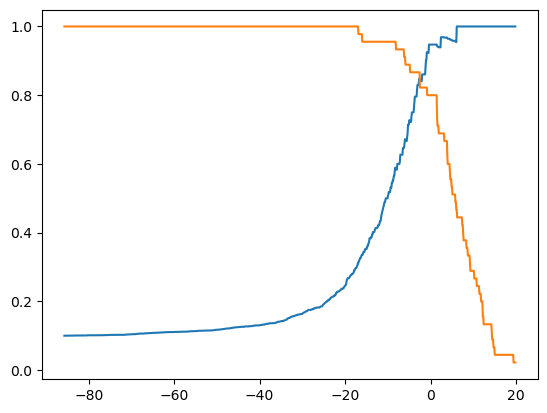

In [22]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)

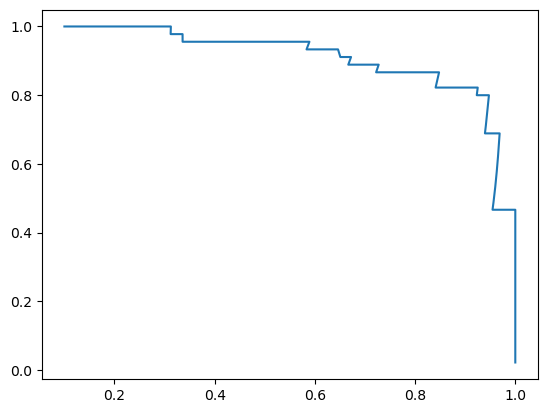

In [23]:
plt.plot(precisions, recalls)

In [24]:
from sklearn.metrics import precision_recall_curve


In [25]:
precision_recall_curve?

Signature:
precision_recall_curve(
    y_true,
    probas_pred,
    *,
    pos_label=None,
    sample_weight=None,
)
Docstring:
Compute precision-recall pairs for different probability thresholds.

Note: this implementation is restricted to the binary classification task.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The last precision and recall values are 1. and 0. respectively and do not
have a corresponding threshold. This ensures that the graph starts on the
y axis.

The first precision and recall values are precision=class balance and recall=1.0
which corresponds to 

In [26]:
from sklearn.metrics import precision_recall_curve

In [29]:
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

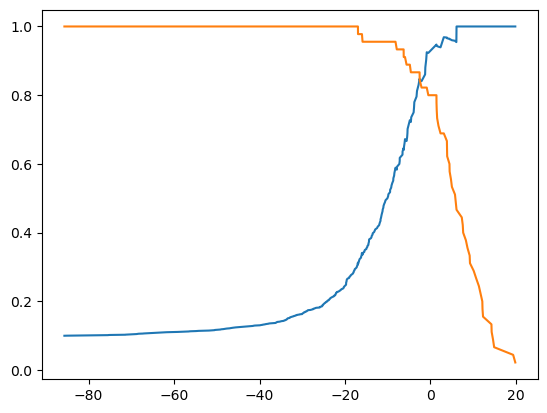

In [31]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])

### ROC curve

In [ ]:
from sklearn.metrics import recall_score
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
precisions = []
recalls = []
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

In [33]:
from sklearn.metrics import roc_curve

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

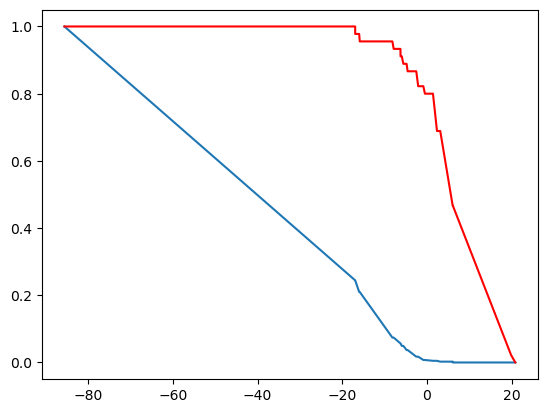

In [37]:
plt.plot(thresholds, fpr)
plt.plot(thresholds, tpr, color='r')


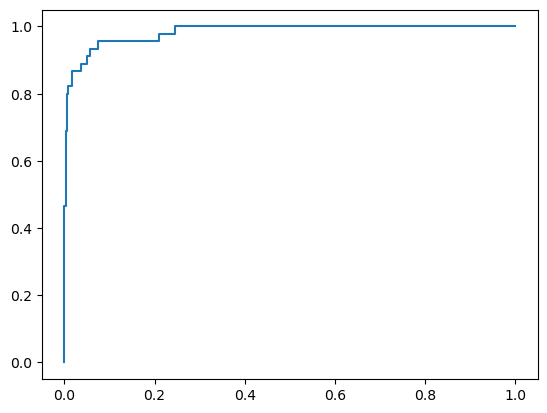

In [36]:
plt.plot(fpr, tpr)